# EDA - Group 1

* Agustin Thevenet
* Daiana Daragona
* Carlos Sánchez 
* Juan Grosso
* Ezequiel Ferrario
* Frans Quispe

#### Import libraries to use in Exploratory Data Analysis

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Download data

In [80]:
#Load datasets
df_products = pd.read_json("https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/products.json")
df_categories = pd.read_json("https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/categories.json")

#### Show exampled of products data

In [81]:
df_products.head(3)

,sku,name,type,price,upc,category,shipping,description,manufacturer,model,url,image
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,5.49,41333424019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,http://www.bestbuy.com/site/duracell-aaa-batte...,http://img.bbystatic.com/BestBuy_US/images/pro...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),HardGood,5.49,41333415017,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Long-lasting energy; DURALOCK Power Preserve t...,Duracell,MN1500B4Z,http://www.bestbuy.com/site/duracell-aa-1-5v-c...,http://img.bbystatic.com/BestBuy_US/images/pro...
2,127687,Duracell - AA Batteries (8-Pack),HardGood,7.49,41333825014,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AA ...,Duracell,MN1500B8Z,http://www.bestbuy.com/site/duracell-aa-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...


#### Calculate basic statistics for dataset

In [82]:
print("Number of rows:", df_products.shape[0])
print("Number of columns:", df_categories.shape[0])

Number of rows: 51646
Number of columns: 4584


Unique values per column

In [83]:
print("Uniques values per column:")
print('\n')
for column in df_products.columns:
    try:
       print(column, df_products[column].nunique())
    except:
        pass

Uniques values per column:


sku 51646
name 48557
type 6
price 1513
upc 51646
shipping 201
description 38537
manufacturer 2363
model 47183
url 51646
image 51569


#### Clean categories dataset. Turn all categories with less than 100 products into "other" category

In [84]:
# Get number of products
num_products = df_products.sku.nunique()

# Get unique categories
unique_categories = df_products['category'].explode().apply(lambda x: x['name']).unique()

# Create a histogram of categories
category_counts = df_products['category'].explode().apply(lambda x: x['name']).value_counts()

# Filter categories with less than 100 products and assign them the category "other" 
threshold = 100
filtered_category_counts = category_counts[category_counts >= threshold]
filtered_categories = filtered_category_counts.index.tolist()
df_products['filtered_category'] = df_products['category'].apply(
    lambda x: [cat['name'] if cat['name'] in filtered_categories else 'other' for cat in x]
)
 
# Obtain the histogram of filtered categories
filtered_category_counts = df_products['filtered_category'].explode().value_counts()

print("Número de productos:", num_products)
print("Categorías únicas:", len(unique_categories))

Número de productos: 51646
Categorías únicas: 1802


#### Histogram of categories

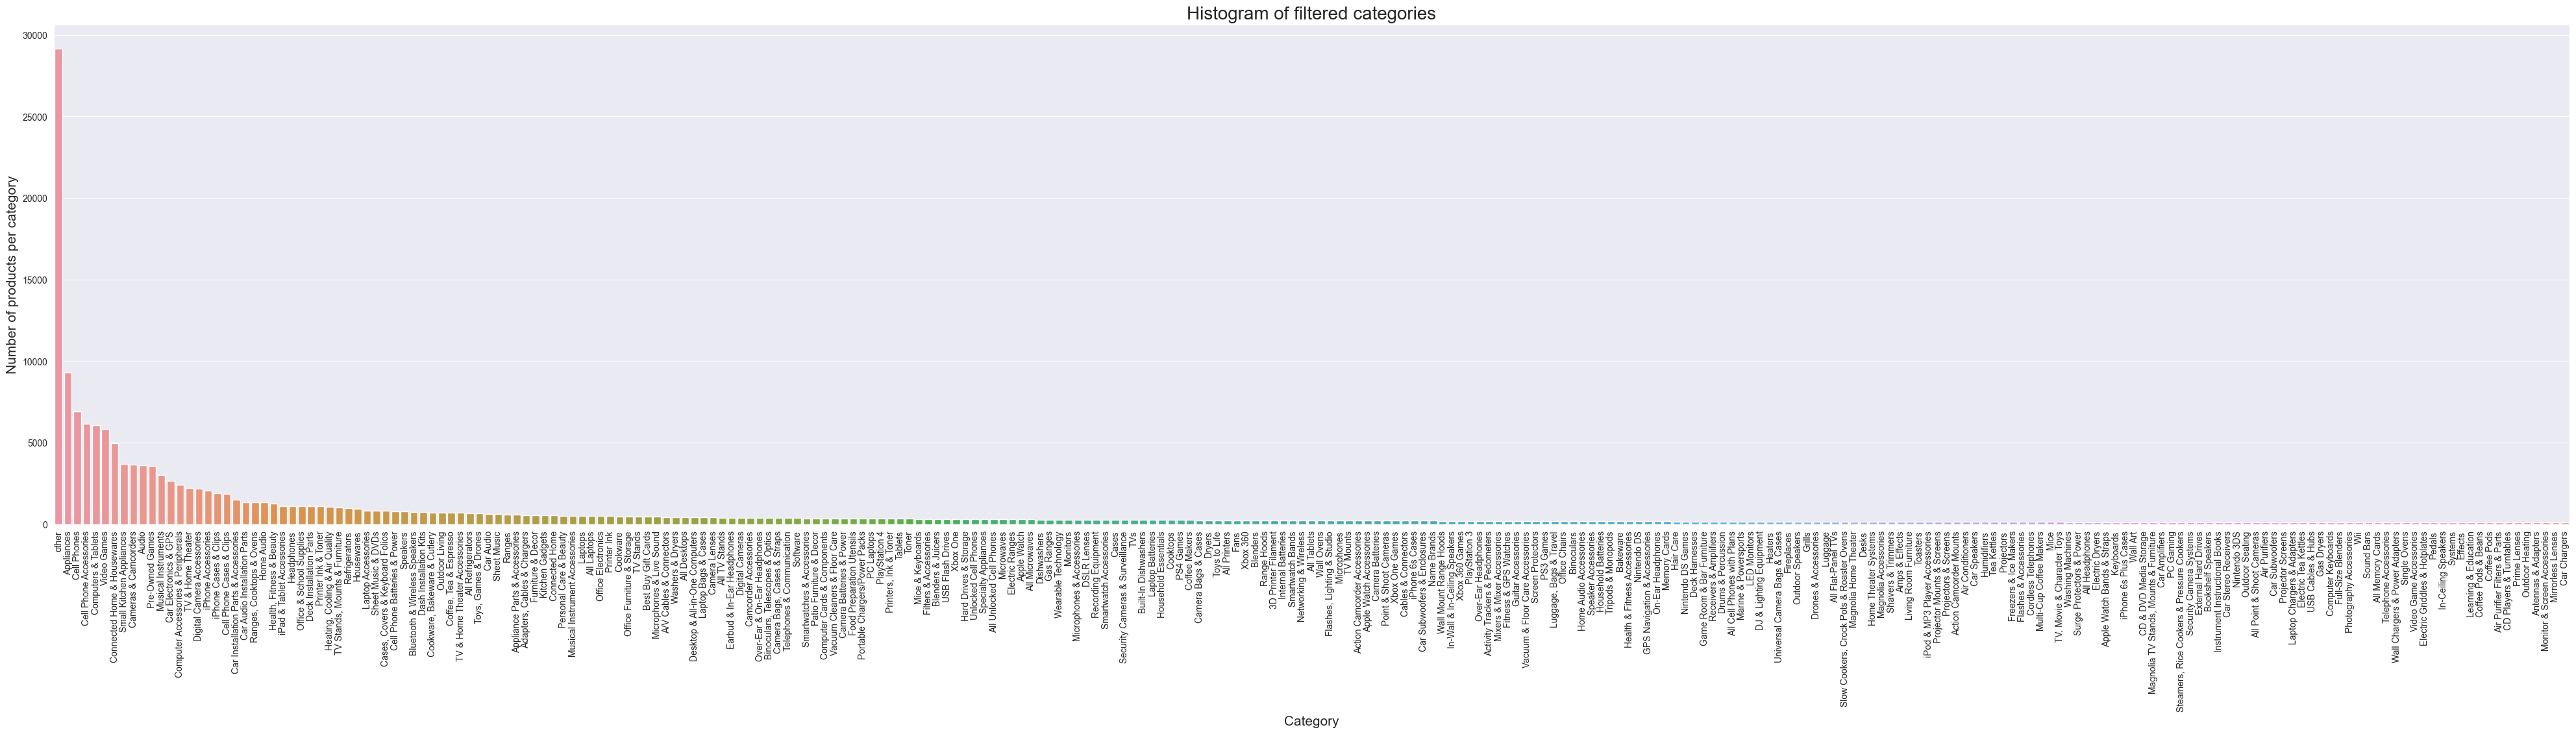

In [85]:
sns.set_style("darkgrid")
plt.figure(figsize=(50, 10))
sns.barplot(x=filtered_category_counts.index, y=filtered_category_counts.values)
plt.title("Histogram of filtered categories", fontsize=20)
plt.ylabel("Number of products per category", fontsize=15)
plt.xlabel("Category", fontsize=15)
plt.xticks(rotation=90)
plt.show()

The most predominant category is "other", followed by "appliances" and "Cell phones

#### Now, let's see how the response variable looks like (Category)

**Product 0**

In [104]:
df_products.category[0]

[{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'},
 {'id': 'pcmcat248700050021', 'name': 'Housewares'},
 {'id': 'pcmcat303600050001', 'name': 'Household Batteries'},
 {'id': 'abcat0208002', 'name': 'Alkaline Batteries'}]

**Product 3530**

In [109]:
df_products.category[3530]

[{'id': 'abcat0800000', 'name': 'Cell Phones'},
 {'id': 'abcat0811002', 'name': 'Cell Phone Accessories'},
 {'id': 'abcat0811004', 'name': 'Cell Phone Batteries & Power'},
 {'id': 'pcmcat326000050010', 'name': 'Portable Chargers/Power Packs'}]

As we can see, each product can have more than one category. So, **this makes the classification task a multi-label classification problem**.

#### Next, we will look at categories dataframe 

In [114]:
print(f'The categories dataset have {df_categories.shape[0]} rows and {df_categories.shape[1]} columns')

The categories dataset have 4584 rows and 4 columns


In [111]:
df_categories.head(3)

,id,name,path,subCategories
0,abcat0010000,Gift Ideas,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'}]","[{'id': 'pcmcat140000050035', 'name': 'Capturi..."
1,abcat0020001,Learning Toys,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'},...",[]
2,abcat0020002,DVD Games,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'},...",[]


Each category has an ID, name, path and a subcategories list. **This also makes the problem more complex as it indicates that the classes we want to predict are hierarchical.**

#### Let's see samples of paths and subCategories to get a better understanding of the data

**Path of Category 1**

In [116]:
df_categories.path[1]

[{'id': 'abcat0010000', 'name': 'Gift Ideas'},
 {'id': 'abcat0014000', 'name': 'Kids'},
 {'id': 'abcat0020000', 'name': 'Toys'},
 {'id': 'abcat0020001', 'name': 'Learning Toys'}]

**subCategories of Category 0**

In [47]:
df_categories.subCategories[0]

[{'id': 'pcmcat140000050035', 'name': 'Capturing Photos & Videos'},
 {'id': 'pcmcat140000050036', 'name': 'Listening to Digital Music'},
 {'id': 'pcmcat140000050037', 'name': 'Computing Made Easy'},
 {'id': 'pcmcat140000050039', 'name': 'Simple GPS Navigation'},
 {'id': 'pcmcat140000050040', 'name': 'Playing Video Games'},
 {'id': 'pcmcat140000050041', 'name': 'Watching HDTV'},
 {'id': 'pcmcat140000050042', 'name': 'Enjoying Favorite Movies'},
 {'id': 'abcat0012000', 'name': 'Him'},
 {'id': 'abcat0011000', 'name': 'Her'},
 {'id': 'abcat0013000', 'name': 'Teens'},
 {'id': 'abcat0014000', 'name': 'Kids'},
 {'id': 'pcmcat84000050001', 'name': 'Anniversaries'},
 {'id': 'pcmcat84000050004', 'name': 'Baby Showers'},
 {'id': 'pcmcat94300050028', 'name': 'Birthdays'},
 {'id': 'pcmcat84000050002', 'name': 'Business Gifts'},
 {'id': 'pcmcat84000050003', 'name': 'Graduations'},
 {'id': 'pcmcat84000050000', 'name': 'Weddings'},
 {'id': 'abcat0020004', 'name': 'Unique Gifts'},
 {'id': 'pcmcat111900

It is also important to take a look at the products' description, to see if there is any pattern that can be used to feed the model.

In [95]:
df_products.description[124]

'65" x 90" - Matte White - 100" Diagonal'

Each category also comes with an image url. 

In [93]:
df_products.image[124]

'http://img.bbystatic.com/BestBuy_US/images/products/1014/1014974_sa.jpg'

#### During the analysis, we also see some duplicated categories, as they have the same name but can have different paths.

All this categories have duplicated rows with the same name

In [122]:
# get rows where name is repeated
df_categories[df_categories.duplicated(subset=['name'], keep=False)].sample(10)

,id,name,path,subCategories
2355,pcmcat244600050008,USB Flash Drives,"[{'id': 'pcmcat128500050004', 'name': 'Name Br...",[]
2518,pcmcat258500050070,iPod/MP3 Player,"[{'id': 'pcmcat128500050004', 'name': 'Name Br...",[]
31,abcat0107000,TV & Home Theater Accessories,"[{'id': 'abcat0100000', 'name': 'TV & Home The...","[{'id': 'pcmcat206100050021', 'name': '3D Glas..."
187,abcat0503012,Ethernet Hubs & Switches,"[{'id': 'abcat0500000', 'name': 'Computers & T...",[]
9,abcat0102003,Blu-ray Players,"[{'id': 'abcat0100000', 'name': 'TV & Home The...","[{'id': 'pcmcat219300050004', 'name': 'Standar..."
3519,pcmcat335400050007,Portable Printers,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",[]
792,cat02881,Piano,"[{'id': 'abcat0600000', 'name': 'Movies & Musi...",[]
981,pcmcat140800050121,Blu-ray & DVD Players,"[{'id': 'pcmcat128500050004', 'name': 'Name Br...",[]
309,abcat0714006,Cameras & Camcorders,"[{'id': 'abcat0700000', 'name': 'Video Games'}...",[]
2510,pcmcat258500050019,iPod/MP3 Player,"[{'id': 'pcmcat128500050004', 'name': 'Name Br...",[]


In [137]:
print('There are', df_categories[df_categories.duplicated(subset=['name'], keep=False)].shape[0], 'duplicated names')

There are 574 duplicated names


**Example**

In [124]:
df_categories[df_categories.name == 'USB Flash Drives']

,id,name,path,subCategories
194,abcat0504010,USB Flash Drives,"[{'id': 'abcat0500000', 'name': 'Computers & T...",[]
2355,pcmcat244600050008,USB Flash Drives,"[{'id': 'pcmcat128500050004', 'name': 'Name Br...",[]


The categories 194 and 2355 have the same name but different path

In [129]:
df_categories.path[194]

[{'id': 'abcat0500000', 'name': 'Computers & Tablets'},
 {'id': 'abcat0515000', 'name': 'Computer Accessories & Peripherals'},
 {'id': 'abcat0504010', 'name': 'USB Flash Drives'}]

In [140]:
df_categories.path[2355]

[{'id': 'pcmcat128500050004', 'name': 'Name Brands'},
 {'id': 'pcmcat210600050000', 'name': 'Kingston'},
 {'id': 'pcmcat244600050008', 'name': 'USB Flash Drives'}]

In [ ]:
pcmcat242800050021
pcmcat252700050006
parece sub pcmcat311300050017
parece sub pcmcat312300050015
pcmcat332000050000